### CS/ECE/ISyE 524 &mdash; Introduction to Optimization &mdash; Spring 2020 ###

# Avocado Transportation Optimization #

#### Team 11: Tz-Ruei Liu (tliu292@wisc.edu), Hashim Hussain Aljarrash(aljarrash@wisc.edu), Zhenyu Zou (zzou24@wisc.edu)

*****

### Table of Contents

1. [Introduction](#1.-Introduction)
1. [Dataset](#2.-Dataset)
1. [Mathematical Model](#3.-Mathematical-Model)
  1. [Two restuarants from eight suppliers](#3.A.-Two-restuarants-from-eight-suppliers)
  1. [Two restuarants from all suppliers](#3.B.-Two-restuarants-from-all-suppliers)
  1. [Two restaurants from all suppliers with time constraint](#3.C.-Two-restuarants-from-all-suppliers-with-time-constraint)
  1. [Optimal restaurant locations](#3.D.-Optimal-restaurant-locations)
1. [Solution](#4.-Solution)
  1. [Two restuarants from eight suppliers](#4.A.-Two-restuarants-from-eight-suppliers)
  1. [Two restuarants from all suppliers](#4.B.-Two-restuarants-from-all-suppliers)
  1. [Two restaurants from all suppliers with time constraint](#4.C.-Two-restuarants-from-all-suppliers-with-time-constraint)
  1. [Optimal restaurant locations](#4.D.-Optimal-restaurant-locations)
1. [Results and Discussion](#5.-Results-and-Discussion)
  1. [Two restuarants from eight suppliers](#5.A.-Two-restuarants-from-eight-suppliers)
  1. [Two restuarants from all suppliers](#5.B.-Two-restuarants-from-all-suppliers)
  1. [Two restaurants from all suppliers with time constraint](#5.C.-Two-restuarants-from-all-suppliers-with-time-constraint)
  1. [Optimal restaurant locations](#5.D.-Optimal-restaurant-locations)
1. [Conclusion](#6.-Conclusion)
  1. [Summary of findings](#6.A.-Summary-of-findings)
  1. [Limitations](#6.B.-Limitations)
  1. [Future directions](#6.C.-Future-directions)

## 1. Introduction ##

Avocados are stone fruit that grow in warm temperature. They have many health benefits; for instance, avocados are a great source of vitamins, including Vitamin C, E, K, and B-5, as well as nicain, magnesium, etc [[1](https://www.medicalnewstoday.com/articles/270406)]. For many US restaurants, avocados are very popular ingredients. There are even avocado-themed restaurants all over the states. Avocado Grill, a resturant located in West Palm Beach, Florida, is a popular avocado-themed restaurant. Its menu includes dishes like avocado vinaigrette and grilled avocado wedges; virtually all food in the menu uses avocado as the main ingredient [[2](https://www.rd.com/advice/travel/avocado-themed-restaurants/)]. Our team is also a big fan of avocados, so we were wondering how to apply the optimization models we learnt in class to this delicious food. 

This project, Avocado Transportation Optimization, aims to determine an optimal route of delivering avocado to restaurants that use avocados as their primary ingredient, while minimizing the total cost, including the cost of purchasing avocados and the cost of transportation from various locations.

We start with a simple problem and expand the scale of the problem as we dive in. At the beginning phase, we suppose that our client only wants to open two restaurants in Madison, Wisconsin and Chicago, Illinois that heavily use avocado. We also restrict suppliers from nearby states. We would like to find where and how many avocados to import to the restaurants that minimizes the total cost.

Next, we no longer restrict importing to nearby states and assume that suppliers are located all over the states. Again, we would like to find the minimum cost from suppliers to the two given restaurants.

Then, we would add a time constraint and propose that the restaurants would like to import avocado in every fixed interval. For instance, real-life restaurants might need to import avocados at least once per month to make sure that avocados are fresh and can be delivered to the customers.

Last but not least, it is also interesting to see where to open the restaurants that minimize the total cost, if the client did not decide the restaurant locations yet.

This report will walk the client through many iterations of the problem, with increasing complexity, in order to provide guidance for restaurants on how to import avocado from the cheapest locations. This model can also be applied to restaurants that use other food ingredients, not only avocados.

## 2. Dataset ##

This project uses a dataset from Kaggle -- Avocado Prices (https://www.kaggle.com/neuromusic/avocado-prices). It contains 14 columns and about 18000 rows. This dataset holds historical data on avocado prices and sales volume in multiple US market. The table below shows the column names and their info.  

Specifically, the column AveragePrice indicates the average price of a single avocado. According to the USDA, an average-sized avocado weighs about 136 grams (equivalently to 0.3 pounds); and we would assume AveragePrice measures the average price of a 0.3 pound avocado.

In [1]:
using JuMP, Clp, CSV, DataFrames, NamedArrays, Cbc, Gurobi, Ipopt
data = CSV.read("avocados_dataset.csv");
model_results = Dict()
describe(data)

,variable,mean,min,median,max,nunique,nmissing
,Symbol,Union…,Any,Union…,Any,Union…,Nothing
1,Week,24.2322,0,24.0,52,,
2,Date,,1/1/2017,,9/6/2015,169,
3,AveragePrice,1.40598,0.44,1.37,3.25,,
4,TotalVolume,850644.0,84.56,1.07377e5,6.25056e7,,
5,4046,2.93008e5,0.0,8645.3,2.27436e7,,
6,4225,2.95155e5,0.0,29061.0,2.04706e7,,
7,4770,22839.7,0.0,184.99,2.54644e6,,
8,TotalBags,2.39639e5,0.0,39743.8,1.93731e7,,
9,SmallBags,1.82195e5,0.0,26362.8,1.33846e7,,


## 3. Mathematical Model ##

$\textbf{Model Type: Minimum Cost Network Flow}$ 

All variants of this project apply minimum cost network flow. This model seeks to find the minimum cost of transporting avocados between any source-sink combination provided to it. 

### 3.A. Two restuarants from eight suppliers ###

$\textbf{Parameters and Assumptions}$ 

The parameters include the number of nodes, N = 10, in which **8 of them are supply nodes and 2 of them are demand nodes**. The supply nodes include Chicago, St Louis, Indianoplis, Louisville, Columbus, Cincinnati, Grand Rapids, and Detroit. (Sources that are in nearby states) The demand nodes are the two restaurants.

It is initially assumed that the client only wants to open **two restaurants**; one in **Madison, Wisconsin** and one in **Chicago, Illinois**. And both restuarants heavily use avocados as their primary food ingredient. 

For the capacity constraint, according to the ABC news, a typical SUV can carry about 1000 pounds of weight at maximum. Thus, we would assume that when transporting avocados from supplier to restaurant, the maximum load capacity/supply is **1000 pounds** [[3](https://abcnews.go.com/2020/story?id=124168)].

For avocado supply, we would vary the amount of avocado that the each supplier can supply to a restaurant and see how transportation route might change, since we don't know the exact supply of avocados at each supplier location. We would try **800 pounds, 1000 pounds, and unlimited supply**.

For avocado demand, it is assumed that the restaurant imports avocados from other states once a month, and it imports avocados that's enough for one month's demand. It is known that an all-avocado resturant in New York city is running 650 pounds of avocados from Monday to Friday. If weekends are included, about 1000 pounds of avocados are needed per week [[4](https://hellogiggles.com/lifestyle/food-drink/avacado-restaurant/)]. Thus, it's assumed that 4000 pounds of avocados are imported for an avocado-themed resturant in New York City. However, for the restuarant in Madison, Wisconsin, the demand would be much lower as it's less crowded than the New York City; thus, we would assume about **2000 pounds** of avocados are demanded monthly. For the restaurant in Chicago, Illinois, we would assume that about **3000 pounds** are demanded monthly, since the restaurant in Chicago would have much more customers than Madison.

For the cost over transportation, it's known that for a typical car, each mile costs on average 13.88 cents. Thus, the cost over transportation would be distance multiplied by **0.1388 dollars**. For the distance between any two locations, each location's longitude and latitude coordinates are first found on Google Map, and the Haversine formula is then applied to find the distance between two locations in miles.

$\textbf{Decision Variables}$ 

The decision variables are the number of avocados transported between supplier and restaurant: $x_{ij}$, where $i$ represents the $i^{th}$ avocado supplier and $j$ represents the $j^{th}$ restaurant. In this case, there are 8 avocado suppliers transporting to a total of 2 restaurants. In addition, the number of avocados transported between demand and supply nodes are non-negative.
  
$$x_{ij} \ge 0$$
$$i=1,...,8$$ $$j=1,2$$

$\textbf{Constraints}$ 

It is assumed that the maximum load capacity betweeen supplier and restaurant is 1000 pounds.

$$x_{ij} \le 1000$$
$$i=1,...,8$$ $$j=1,2$$

Suppliers have varying supply limits. We would try three different options.

$$ \sum_{j=1}^2 x_{ij} = 800 \text { } \forall i=1,..,8 $$ $$or$$
$$ \sum_{j=1}^2 x_{ij} = 1000 \text { } \forall i=1,..,8 $$ $$or$$
$$ Unlimited $$

Restuarants have known demand limits. It is assumed that one demands 2000 pounds and one demands 3000 pounds.

$$ \sum_{i=1}^8 x_{i1} = 2000, \sum_{i=1}^8 x_{i2} = 3000 $$

$\textbf{Objective}$ 

$$ Minimize \sum_{i=1}^8 \sum_{j=1}^2 d_{ij}*avgPPM + x_{ij}*c_i $$

We assume the total cost is the sum of two costs. One cost is the transportation cost between the $i^{th}$ supplier and the $j^{th}$ restuarant; and the other cost is the amount paid to buy certain amount of avocados from the $i^{th}$ supplier. $d_{ij}$ represents the distance between the $i^{th}$ supplier to the $j^{th}$ restaurant in miles; $avgPPM$ represents the average fuel price in dollars per mile, or 0.1388 in our assumption; $c_i$ represents the average cost of avocado in dollars per pound from the $i^{th}$ supplier.


### 3.B. Two restuarants from all suppliers ###

$\textbf{Parameters and Assumptions}$ 

Parameters in 3.B. are similar to paramters in 3.A., and the only difference is the number of suppliers. The parameters include the number of nodes, N = 50, in which **48 of them are supply nodes and 2 of them are demand nodes**. The supply nodes include Albany, Atlanta, Baltimore Washington, Boise, Boston, Buffalo Rochester, California, Charlotte, Chicago, Cincinnati Dayton, Columbus, DallasFtWorth, Denver, Detroit, GrandRapids, Great Lakes, Harrisburg Scranton, Hartford Springfield, Houston, Indianapolis, Jacksonville, Las Vegas, Los Angeles, Louisville, MiamiFtLauderdale, Nashville, NewOrleans Mobile, New York, Northern New England, Orlando, Philadelphia, Phoenix Tucson, Pittsburgh, Plains, Portland, Raleigh Greensboro, Richmond Norfolk, Roanoke, Sacramento, San Diego, San Francisco, Seattle, South Carolina, Spokane, StLouis, Syracuse, Tampa, West Tex New Mexico. The demand nodes are again the two restaurants: one in **Madison, Wisconsin**, and one in **Chicago, Illinois**. For the capacity constraint and assumptions regarding avocado demand and supply, the assumptions remain the same.

$\textbf{Decision Variables}$

The decision variables are, again, the number of avocados transported between supplier and restaurant: $x_{ij}$, where $i$ represents the $i^{th}$ avocado supplier and $j$ represents the $j^{th}$ restaurant. In this case, there are 48 avocado suppliers transporting to 2 restaurants. In addition, the number of avocados transported between demand and supply nodes are non-negative.
  
$$x_{ij} \ge 0$$
$$i=1,...,48$$ $$j=1,2$$

$\textbf{Constraints}$ 

Constraints remain the same. It is assumed that the maximum load capacity betweeen supplier and restaurant is 1000 pounds.

$$x_{ij} \le 1000$$
$$i=1,...,48$$ $$j=1,2$$

Restuarants have known demand limits. It is assumed that one demands 2000 pounds and one demands 3000 pounds.

$$ \sum_{i=1}^8 x_{i1} = 2000, \sum_{i=1}^8 x_{i2} = 3000 $$

In 3.A., we did a lot of analysis regarding the changes of avocado transportation with different supplier capacity (800, 1000, unlimited). However, for simplicity, we assume suppliers have unlimited supply of avocado in 3.B.

$\textbf{Objective}$ 

$$ Minimize \sum_{i=1}^{48} \sum_{j=1}^2 d_{ij}*avgPPM + x_{ij}*c_i $$

Similarly, we assume the total cost is the sum of two costs. One cost is the transportation cost between the $i^{th}$ supplier and the $j^{th}$ restuarant; and the other cost is the amount paid to buy certain amount of avocados from the $i^{th}$ supplier. $d_{ij}$ represents the distance between the $i^{th}$ supplier to the $j^{th}$ restaurant in miles; $avgPPM$ represents the average fuel price in dollars per mile, or 0.1388 in our assumption; $c_i$ represents the average cost of avocado in dollars per pound from the $i^{th}$ supplier.


### 3.C. Two restuarants from all suppliers with time constraint ###

$\textbf{Parameters and Assumptions}$ 

Parameters in 3.C. are more complicated than 3.A. and 3.B., because we enforce the time constraint that each restaurant needs to import avocados from suppliers within a fixed time interval. The parameters still include number of nodes, N = 50, where **48 of them are supply nodes and 2 of them are demand nodes**. However, for each demand node, there is **a weekly transportation schedule from 48 supply nodes**, indicating where the avocados are imported in a weekly manner.

**In the following, we only list the decision variables, constraints, and objective for the restaurant in Madison, Wisconsin, because both restaurants are sharing the same model and the same parameters except for avocado demand.**

$\textbf{Decision Variables}$

The decision variables are the number of avocados transported between the restaurant in Madison, Wisconsin and suppliers all over the states in a weekly manner: $y_{ij}$, where $i$ represents the $i^{th}$ week and $j$ represents the $j^{th}$ supplier. There are in total 52 weeks in a year and 48 suppliers all over the states. The number of avocados transported for each week is non-negative.

$$y_{ij} \ge 0$$
$$i=1,...,52$$ $$j=1,...,48$$

In addition, there is a binary variable $z_i$, where $i$ represents the $i^{th}$ week.

$$z_{i}= \begin{cases} 
      1 & \text{if any supplier transports avocados to restaurant in the $i^{th}$ week } \\
      0 & \text{otherwise}
   \end{cases}
$$

$\textbf{Constraints}$ 

Restaurant imports once per month.

$$ z_i + z_{i+1} + z_{i+2} + z_{i+3} = 1 \text { } \forall i=1,5,9,...,49$$

Restaurant cannot import consecutively. In other words, two imports must be separated by at least 2 weeks.

$$ z_i + z_{i+1} \le 1 \text { } \forall i=1,2,3,...,51$$

Restuarant in Madison, Wisconsin demands 2000 pounds of avocados per month. In other words, for the importing week, suppliers needs to transport 2000 pounds of avocados to the restaurant. For other weeks, no suppliers should be transporting avocados to the restuarant. For the restaruant in Chicago, Illinois, this number is 3000 pounds.

$$ \sum_{j=1}^{48} y_{ij} = 2000z_{i} \text { } \forall i=1,2,3,...,52$$

Capacity constraint remains the same. It is assumed that the maximum load capacity betweeen supplier and restaurant is 1000 pounds.

$$y_{ij} \le 1000$$
$$ i=1,...,52 $$
$$ j=1,...,48 $$

$\textbf{Objective}$ 

$$ Minimize \sum_{i=1}^{52} \sum_{j=1}^{48} d_{j1}*avgPPM + y_{ij}*c_{ij} $$

Here, we assume the total cost is the sum of two costs through all weeks. One cost is the transportation cost between the $j^{th}$ supplier and the restuarant in Madison, Wisconsin; and the other cost is the amount paid to buy certain amount of avocados from the $i^{th}$ supplier. $d_{j1}$ represents the distance between the $j^{th}$ supplier and the restaurant in Madison, Wisconsin in miles; $avgPPM$ represents the average fuel price in dollars per mile, or 0.1388 in our assumption; $c_{ij}$ represents the average cost of avocado in dollars per pound from the $j^{th}$ supplier in the $i^{th}$ week.  

Again, this objective is only for the restaurant in Madison, Wisconsin. We do the same thing for the restaurant in Chicago, Illinois in later computation.


### 3.D. Optimal restaurant locations ###

$\textbf{Parameters and Assumptions}$ 

The parameters include all the possible locations that may be used by any client who intends to open two restaurants. Here, we select the possible restaurant locations from the given supplier locations listed in the dataset. To be consistent with the assumption in 3.A and 3.B, we would try 2 different options. The first option selects 2 restaurant locations from 8 locations listed in 3.A. The second option selects 2 restaurant locations from all 48 locations listed in 3.B.

Capacity constraint remains the same. It is assumed that the maximum load capacity betweeen supplier and restaurant is 1000 pounds.

For avocado supply, it is still assumed **unlimited supply**.

For avocado demand, it is assumed that the two restaurants both demand **2000 pounds** of avocados for simplicity (can be relaxed for complexity).

**In the following, we only list the decision variables, constraints, and objective for selecting two restaruants from 8 possible locations; the same rule applies to selecting two restaruants from all 48 possible locations.**

$\textbf{Decision Variables}$ 

The decision variables are the number of avocados transported between supplier and restaurant: $x_{ij}$, where $i$ represents the $i^{th}$ avocado supplier and $j$ represents the $j^{th}$ restaurant. In this case, there are 8 avocado suppliers transporting to a total of 8 possible restaurants.

$z_i$ corresponds to the possible choices of locations of two restaurants that we desired.

$$x_{ij} \ge 0$$
$$z_{i} $$
$$i=1,...,8$$ $$j=1,...,8$$

$\textbf{Constraints}$ 

It is assumed that we want two restaurant locations that minimize the total cost.

$$ \sum_{i=1}^8 z_{i} = 2 \text { } $$

It is assumed that the maximum load capacity betweeen supplier and restaurant is 1000 pounds.

$$x_{ij} \le 1000$$
$$i=1,...,8$$ $$j=1,...,8$$

Restuarants have known demand limits. It is assumed that one demands 2000 pounds.

$$ \sum_{i=1}^8 x_{i=1,...,8} = 2000 * z_j \text { } \forall j=1,..,8 $$

$\textbf{Objective}$ 

$$ Minimize \sum_{i=1}^8 \sum_{j=1}^2 d_{ij}*avgPPM + x_{ij}*z_{i}*c_i $$

The parameters in the objective function are the same as in 3.C.


## 4. Solution ##

### 4.A. Two restuarants from eight suppliers ###

In [2]:
# Restrict dataset to suppliers from nearby states
# Calculate the average price of a single avocado over all time periods
# A single avocado weighs 0.3 pounds
states = ["Chicago","StLouis","Indianapolis","Louisville","Columbus","CincinnatiDayton","GrandRapids","Detroit"]
avgPrice = []
for loc in states
    dataRes = data[(data.region .== loc), :]
    append!(avgPrice, sum(dataRes.AveragePrice)/nrow(dataRes))
end
# Average price per pound is thus 3.33 times the avgPrice (0.3 pounds/dollars)
avgPricePerPd = avgPrice * 3.33;

In [3]:
avgPPM = 0.1388; # the average price of transportation in dollars per mile

In [4]:
# Calculate distance among suppliers and restaurants
function distance(lat1, lon1, lat2, lon2)
    # Code from GeeksForGeeks - Haversine formula
    # calculate distance in miles given longitude and latitude coordinates
    dLat = (lat2 - lat1) * pi / 180.0
    dLon = (lon2 - lon1) * pi / 180.0  
    # convert to radians 
    lat1 = (lat1) * pi / 180.0
    lat2 = (lat2) * pi / 180.0
    # apply formula 
    a = (sin(dLat / 2)^2 + sin(dLon / 2)^2 * cos(lat1) * cos(lat2))
    rad = 6371
    c = 2 * asin(sqrt(a)) 
    return rad * c * 0.621371
end

chicago = [41.8781, -87.6298]
stLouis = [38.6270, -90.1994]
indianapolis = [39.7684, -86.1581]
louisville = [38.2527, -85.7585]
columbus = [39.9612, -82.9988]
cincinnatiDayton = [39.1031, -84.5120]
grandRapids = [42.9634, -85.6681]
detroit = [42.3314, -83.0458]
madison = [43.0731, -89.4012]

# 8 suppliers
sources = [chicago, stLouis, indianapolis, louisville, columbus, cincinnatiDayton, grandRapids, detroit]
# 2 restaurants
demands = [madison, chicago]
dist = zeros((8, 2))
for i in 1:8
    for j in 1:2
        dist[i, j] = distance(sources[i][1], sources[i][2], demands[j][1], demands[j][2]);
    end
end

# This lists the distance between 8 suppliers and 2 restaurants
# and would be used to calculate the cost of transportation
sourceSts = ["CH","SL","ID","LS","CL","CC","GR","DT"]
demandSts = ["MD", "CH"]
NamedArray(dist, (sourceSts, demandSts), ("SUPPLY","DEMAND"))

8×2 Named Array{Float64,2}
SUPPLY ╲ DEMAND │      MD       CH
────────────────┼─────────────────
CH              │ 122.331      0.0
SL              │ 310.011  262.301
ID              │ 283.443  164.822
LS              │   383.8  269.307
CL              │ 394.712  275.622
CC              │ 374.117  252.155
GR              │  188.72  125.032
DT              │ 326.661  237.032

#### 4.A.i Each supplier supplies a maximum 800 pounds of avocados

In [5]:
# Network Flow Problem in Clp
m = Model()
@variable(m, x[1:8, 1:2] >= 0)
for i in 1:8
    # the supplier constraint
    # each supplier can supply 800 pounds of avocados
    @constraint(m, x[i,1] + x[i,2] <= 800)
end

# The capacity constraint
# each time, the SUV cannot transport more than 1000 pounds of avocados
for i in 1:8
    for j in 1:2
         @constraint(m, x[i,j] <= 1000)
    end
end

# The demand constraint
# one restaurant demands a total of 2000 pounds, one demands 3000 pounds
@constraint(m, sum(x[i,1] for i in 1:8) == 2000)
@constraint(m, sum(x[i,2] for i in 1:8) == 3000)

# Objective: minimize the total cost
# total cost = transportation cost + avocado cost
@objective(m, Min, sum(dist[i,j] * avgPPM + x[i,j] * avgPricePerPd[i] for j in 1:2 for i in 1:8))
optimize!(m, with_optimizer(Clp.Optimizer))
println(termination_status(m))

OPTIMAL
Coin0506I Presolve 10 (-16) rows, 16 (0) columns and 32 (-16) elements
Clp0006I 0  Obj 551.04551 Primal inf 5000 (2)
Clp0006I 15  Obj 22251
Clp0000I Optimal - objective value 22251
Coin0511I After Postsolve, objective 22251, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 22251.00037 - 15 iterations time 0.002, Presolve 0.00


In [6]:
# Store the result
model_results["A.i"] = value.(x);

#### 4.A.ii Each supplier supplies a maximum 1000 pounds of avocados

In [7]:
# Network Flow Problem in Clp
m = Model()
@variable(m, x[1:8, 1:2] >= 0)

# The supplier constraint
# each supplier can supply 1000 pounds of avocados
for i in 1:8
    @constraint(m, x[i,1] + x[i,2] <= 1000)
end

# The capacity constraint
# each time, the SUV cannot transport more than 1000 pounds of avocados
for i in 1:8
    for j in 1:2
         @constraint(m, x[i,j] <= 1000)
    end
end

# The demand constraint
# one restaurants demands a total of 2000 pounds, one 3000 pounds
@constraint(m, sum(x[i,1] for i in 1:8) == 2000)
@constraint(m, sum(x[i,2] for i in 1:8) == 3000)

# Objective: minimize the total cost
# total cost = transportation cost + avocado cost
@objective(m, Min, sum(dist[i,j] * avgPPM + x[i,j] * avgPricePerPd[i] for j in 1:2 for i in 1:8))
optimize!(m, with_optimizer(Clp.Optimizer))
println(termination_status(m))

OPTIMAL
Coin0506I Presolve 10 (-16) rows, 16 (0) columns and 32 (-16) elements
Clp0006I 0  Obj 551.04551 Primal inf 5000 (2)
Clp0006I 7  Obj 21659.108
Clp0000I Optimal - objective value 21659.108
Coin0511I After Postsolve, objective 21659.108, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 21659.10764 - 7 iterations time 0.002, Presolve 0.00


In [8]:
# Store the result
model_results["A.ii"] = value.(x);

#### 4.A.iii Each supplier has unlimited supply of avocados

In [9]:
# Network Flow Problem in Clp
m = Model()
@variable(m, x[1:8, 1:2] >= 0)

# The capacity constraint
# each time, the SUV cannot transport more than 1000 pounds of avocados
for i in 1:8
    for j in 1:2
         @constraint(m, x[i,j] <= 1000)
    end
end

# The demand constraint
# one restaurants demands a total of 2000 pounds, one 3000 pounds
@constraint(m, sum(x[i,1] for i in 1:8) == 2000)
@constraint(m, sum(x[i,2] for i in 1:8) == 3000)

# Objective: minimize the total cost
# total cost = transportation cost + avocado cost
@objective(m, Min, sum(dist[i,j] * avgPPM + x[i,j] * avgPricePerPd[i] for j in 1:2 for i in 1:8))
optimize!(m, with_optimizer(Clp.Optimizer))
println(termination_status(m))

OPTIMAL
Coin0506I Presolve 2 (-16) rows, 16 (0) columns and 16 (-16) elements
Clp0006I 0  Obj 551.04551 Primal inf 5000 (2)
Clp0006I 2  Obj 21197.243
Clp0000I Optimal - objective value 21197.243
Coin0511I After Postsolve, objective 21197.243, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 21197.24256 - 2 iterations time 0.002, Presolve 0.00


In [10]:
# Store the result
model_results["A.iii"] = value.(x);

In [12]:
# A new assumption - repeated trips are allowed
m = Model()
@variable(m, x[1:8, 1:2] >= 0)
@variable(m, z[1:8, 1:2] >= 0)

# The capacity constraint
# each time, the SUV cannot transport more than 1000 pounds of avocados
for i in 1:8
    for j in 1:2
         @constraint(m, x[i,j] <= 1000)
    end
end

# The demand constraint
# one restaurants demands a total of 2000 pounds, one 3000 pounds
@constraint(m, sum(x[i,1]*z[i,1] for i in 1:8) == 2000)
@constraint(m, sum(x[i,2]*z[i,2] for i in 1:8) == 3000)

# Objective: minimize the total cost
# total cost = transportation cost + avocado cost
@objective(m, Min, sum(dist[i,j] * avgPPM + x[i,j]*z[i,j] * avgPricePerPd[i] for j in 1:2 for i in 1:8))
optimize!(m, with_optimizer(Ipopt.Optimizer, print_level=0))
println(termination_status(m))

LOCALLY_SOLVED


In [13]:
# Store the result
model_results["A.iii.repeated"] = value.(x.*z);

### 4.B. Two restuarants from all suppliers ###

In [14]:
# Calculate the average price of a single avocado over all time periods from all locations
# A single avocado weighs 0.3 pounds
states = ["Albany","Atlanta","BaltimoreWashington","Boise","Boston","BuffaloRochester","California","Charlotte",
          "Chicago","CincinnatiDayton","Columbus","DallasFtWorth","Denver","Detroit","GrandRapids","GreatLakes",
          "HarrisburgScranton","HartfordSpringfield","Houston","Indianapolis","Jacksonville","LasVegas","LosAngeles",
          "Louisville","MiamiFtLauderdale","Nashville","NewOrleansMobile","NewYork","NorthernNewEngland",
          "Orlando","Philadelphia","PhoenixTucson","Pittsburgh","Plains","Portland","RaleighGreensboro","RichmondNorfolk",
          "Roanoke","Sacramento","SanDiego","SanFrancisco","Seattle","SouthCarolina","Spokane","StLouis","Syracuse",
          "Tampa","WestTexNewMexico"]
avgPrice = []
for loc in states
    dataRes = data[(data.region .== loc), :]
    append!(avgPrice, sum(dataRes.AveragePrice)/nrow(dataRes))
end
# Average price per pound is thus 3.33 times the avgPrice (0.3 pounds/dollars)
avgPricePerPd = avgPrice * 3.33;

In [15]:
# The coordinates of all 48 suppliers
# Calculate the distance between different suppliers
# for computing the transportation cost between supplier and restaurant
albany = [42.6526, -73.7562]
atlanta = [33.7490, -84.3880]
baltimore = [39.1774, -76.6684]
boise = [43.6150, -116.2023]
boston = [42.3601, -71.0589]
buffalo = [42.8864, -78.8784]
california = [36.7783, -119.4179]
charlotte = [35.2271, -80.8431]
chicago = [41.8781, -87.6298]
cincinnatiDayton = [39.1031, -84.5120]
columbus = [39.9612, -82.9988]
dallas = [32.7767, -96.7970]
denver = [39.7392, -104.9903]
detroit = [42.3314, -83.0458]
grandRapids = [42.9634, -85.6681]
greatLakes = [45.0522, -82.4846]
harrisburgScranton = [41.4090, -75.6624]
hartfordSpringfield = [41.7658, -72.6734]
houston = [29.7604, -95.3698]
indianapolis = [39.7684, -86.1581]
jacksonville = [30.3322, -81.6557]
lasVegas = [36.1699, -115.1398]
losAngeles = [34.0522, -118.2437]
louisville = [38.2527, -85.7585]
miamiFtLauderdale = [25.7617, -80.1918]
nashville = [36.1627, -86.7816]
newOrleansMobile = [29.9511, -90.0715]
newYork = [40.7128, -74.0060]
northernNewEngland = [43.9654, -70.8227]
orlando = [28.5383, -81.3792]
philadelphia = [39.9526, -75.1652]
phoenixTucson = [32.2178, -110.8758]
pittsburgh = [40.4406, -79.9959]
plains = [37.2603, -100.5927]
portland = [45.5051, -122.6750]
raleighGreensboro = [36.0726, -79.7920]
richmondNorfolk = [37.5407, -77.4360]
roanoke = [37.2710, -79.9414]
sacramento = [38.5816, -121.4944]
sanDiego = [32.7157, -117.1611]
sanFrancisco = [37.7749, -122.4194]
seattle = [47.6062, -122.3321]
southCarolina = [33.8361, -81.1637]
spokane = [47.6588, -117.4260]
stLouis = [38.6270, -90.1994]
syracuse = [43.0481, -76.1474]
tampa = [27.9506, -82.4572]
westTexNewMexico = [34.5199, -105.8701]
madison = [43.0731, -89.4012]

# 48 suppliers
sources = [albany, atlanta, baltimore, boise, boston, buffalo, california, charlotte, chicago, cincinnatiDayton, 
           columbus, dallas, denver, detroit, grandRapids, greatLakes, harrisburgScranton, hartfordSpringfield,
           houston, indianapolis, jacksonville, lasVegas, losAngeles, louisville, miamiFtLauderdale, nashville,
           newOrleansMobile, newYork, northernNewEngland, orlando, philadelphia, phoenixTucson, pittsburgh, plains, 
           portland, raleighGreensboro, richmondNorfolk, roanoke, sacramento, sanDiego, sanFrancisco, seattle, 
           southCarolina, spokane, stLouis, syracuse, tampa, westTexNewMexico]

# 2 restaurants
demands = [madison, chicago]
dist = zeros((48, 2))
for i in 1:48
    for j in 1:2
        dist[i, j] = distance(sources[i][1], sources[i][2], demands[j][1], demands[j][2]);
    end
end

In [16]:
# Network Flow Problem in Clp
m = Model()
@variable(m, x[1:48, 1:2] >= 0)

# The capacity constraint
# each time, the SUV cannot transport more than 1000 pounds of avocados
for i in 1:48
    for j in 1:2
         @constraint(m, x[i,j] <= 1000)
    end
end

# The demand constraint
# one restaurant demands a total of 2000 pounds, and one demands 3000 pounds
@constraint(m, sum(x[i,1] for i in 1:48) == 2000)
@constraint(m, sum(x[i,2] for i in 1:48) == 3000)

# Objective: minimize the total cost
# total cost = transportation cost + avocado cost
@objective(m, Min, sum(dist[i,j] * avgPPM + x[i,j] * avgPricePerPd[i] for j in 1:2 for i in 1:48))
optimize!(m, with_optimizer(Clp.Optimizer))
println(termination_status(m))

OPTIMAL
Coin0506I Presolve 2 (-96) rows, 96 (0) columns and 96 (-96) elements
Clp0006I 0  Obj 11600.129 Primal inf 5000 (2)
Clp0006I 2  Obj 29836.017
Clp0000I Optimal - objective value 29836.017
Coin0511I After Postsolve, objective 29836.017, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 29836.017 - 2 iterations time 0.002, Presolve 0.00


In [17]:
# Store the result
model_results["B"] = value.(x);

### 4.C. Two restuarants from all suppliers with time constraint ###

In [18]:
# Get the average price of avocados from each supplier in a weekly manner
states = ["Albany","Atlanta","BaltimoreWashington","Boise","Boston","BuffaloRochester","California","Charlotte",
          "Chicago","CincinnatiDayton","Columbus","DallasFtWorth","Denver","Detroit","GrandRapids","GreatLakes",
          "HarrisburgScranton","HartfordSpringfield","Houston","Indianapolis","Jacksonville","LasVegas","LosAngeles",
          "Louisville","MiamiFtLauderdale","Nashville","NewOrleansMobile","NewYork","NorthernNewEngland",
          "Orlando","Philadelphia","PhoenixTucson","Pittsburgh","Plains","Portland","RaleighGreensboro","RichmondNorfolk",
          "Roanoke","Sacramento","SanDiego","SanFrancisco","Seattle","SouthCarolina","Spokane","StLouis","Syracuse",
          "Tampa","WestTexNewMexico"]
avgPriceWk = []
for j in 1:2496
    append!(avgPriceWk, j)
end
avgPriceWk = reshape(avgPriceWk,52,48)

for week in 1:52
    for locIndex in 1:48
        loc = states[locIndex]
        dataRes = data[(data.Week .== 52-week) .& (data.region .== loc), :]
        avgPriceWk[week, locIndex] = sum(dataRes.AveragePrice)/nrow(dataRes)
    end
end

# Average price per pound is 3.33 times the avgPrice (0.3 pounds/dollars)
avgPriceWkPerPd = avgPriceWk * 3.33;

# list the price table of avocados from different suppliers in a weekly manner
weeks = [i for i in 1:52]
NamedArray(avgPriceWkPerPd, (weeks, states), ("WEEK","SUPPLY"))

52×48 Named Array{Float64,2}
WEEK ╲ SUPPLY │              Albany  …     WestTexNewMexico
──────────────┼────────────────────────────────────────────
1             │              5.1504  …              3.20513
2             │             5.27805                  3.7074
3             │              5.2392                  3.6741
4             │             5.08935                 3.90165
5             │              4.9839                  3.6075
6             │              4.8063                 3.66855
7             │             5.07825                  3.6852
8             │             5.03385                  3.8406
9             │              4.8951                  3.7296
10            │              5.3058                  3.5964
11            │              5.1837                 3.56865
12            │              5.1282                 3.79065
⋮                                 ⋮  ⋱                    ⋮
41            │             4.93256                 5.00333
42         

In [24]:
# Network Flow Problem in Cbc
# Get the transportation schedule for two restaurants
m = Model()
@variable(m, x_mad[1:52, 1:48] >= 0)
@variable(m, x_chi[1:52, 1:48] >= 0)
@variable(m, z_mad[1:52], Bin)
@variable(m, z_chi[1:52], Bin)

# Import time constraint
# each restaurant imports once per month
for i in 1:4:52
    @constraint(m, sum(z_mad[j] for j in i:i+3) == 1)
    @constraint(m, sum(z_chi[j] for j in i:i+3) == 1)
end

# Import once at least every two weeks
# each restaurant cannot import straight twice (twice in two weeks)
for i in 1:51
    @constraint(m, z_mad[i] + z_mad[i+1] <= 1)
    @constraint(m, z_chi[i] + z_chi[i+1] <= 1)
end

# The demand constraint
# restaurant in Madison demands 2000 pounds per month
# restaurant in Chicago demands 3000 pounds per month
for i in 1:52
    @constraint(m, sum(x_mad[i,:]) == 2000*z_mad[i])
    @constraint(m, sum(x_chi[i,:]) == 3000*z_chi[i])
end

# The capacity constraint
# each time, the SUV cannot transport more than 1000 pounds of avocados
for i in 1:52
    for j in 1:48
        @constraint(m, x_mad[i,j] <= 1000)
        @constraint(m, x_chi[i,j] <= 1000)
    end
end

# Objective: minimize the total cost for both restaurants
# total cost = transportation cost + avocado cost
@objective(m, Min, sum(dist[j,1]*avgPPM + x_mad[i,j]*avgPriceWkPerPd[i,j] for j in 1:48 for i in 1:52)
                    + sum(dist[j,2]*avgPPM + x_chi[i,j]*avgPriceWkPerPd[i,j] for j in 1:48 for i in 1:52))
optimize!(m, with_optimizer(Cbc.Optimizer))
println(termination_status(m))

OPTIMAL
Objective value:830565.2399738753
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Oct  7 2019 

command line - Cbc_C_Interface -solve -quit (default strategy 1)
Continuous objective value is 221358 - 0.05 seconds
Cgl0003I 0 fixed, 0 tightened bounds, 70 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 34 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 26 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 23 strengthened rows, 0 substitutions
Cgl0004I processed model has 154 rows, 4929 columns (104 integer (104 of which binary)) and 5081 elements
Cbc0012I Integer solution of 228650.29 found by DiveCoefficient after 0 iterations and 0 nodes (0.14 seconds)
Cbc0038I Full problem 154 rows 4929 columns, reduced to 75 rows 2791 columns - 7 fixed gives 56, 2260 - still too large
Cbc0012I Integer solution of 227358.52 found by DiveCoefficient after 133 iterations and 0 nodes (0.20 seconds)
Cbc0031I 99 ad

In [25]:
# Store the result
# Transporation schedule for restuarant in Madison
model_results["C_mad"] = value.(x_mad);

In [26]:
# Store the result
# Transporation schedule for restuarant in Chicago
model_results["C_chi"] = value.(x_chi);

### 4.D. Optimal restaurant locations###

#### 4.D.i Choose two restuarants from eight suppliers

In [27]:
# Set up the 8 possible locations
sources = [chicago, stLouis, indianapolis, louisville, columbus, cincinnatiDayton, grandRapids, detroit]
demands = [chicago, stLouis, indianapolis, louisville, columbus, cincinnatiDayton, grandRapids, detroit]
dist_new = zeros((8, 8))
for i in 1:8
    for j in 1:8
        dist_new[i, j] = distance(sources[i][1], sources[i][2], demands[j][1], demands[j][2]);
    end
end

In [28]:
# Choosing two restaurants from 8 sources
m = Model(with_optimizer(Gurobi.Optimizer,OutputFlag=0))
@variable(m, z[1:8], Bin)
@variable(m, x[1:8, 1:8] >= 0)
@constraint(m, sum(z[i] for i in 1:8) == 2)

# The capacity constraint
# each time, the SUV cannot transport more than 1000 pounds of avocados
for i in 1:8
    for j in 1:8
         @constraint(m, x[i,j] * z[j] <= 1000)
    end
end

# The demand constraint
# both restaurant demands 2000 pounds of avocados
for i in 1:8
    @constraint(m, sum(x[j, i] for j in 1:8) == 2000 * z[i])
end

# Objective: minimize the total cost
# total cost = transportation cost + avocado cost
@objective(m, Min, sum(dist_new[i,j] * avgPPM + x[i,j] * z[j] * avgPricePerPd[i] for j in 1:8 for i in 1:8))
optimize!(m)
println(termination_status(m))
model_results["Opt_2r8s_noLimit"] = value.(x);

Academic license - for non-commercial use only
Academic license - for non-commercial use only
OPTIMAL


#### 4.D.ii Choose two restuarants from all suppliers

In [29]:
# Set up all 48 possible locations
sources = [albany, atlanta, baltimore, boise, boston, buffalo, california, charlotte, chicago, cincinnatiDayton, 
           columbus, dallas, denver, detroit, grandRapids, greatLakes, harrisburgScranton, hartfordSpringfield,
           houston, indianapolis, jacksonville, lasVegas, losAngeles, louisville, miamiFtLauderdale, nashville,
           newOrleansMobile, newYork, northernNewEngland, orlando, philadelphia, phoenixTucson, pittsburgh, plains, 
           portland, raleighGreensboro, richmondNorfolk, roanoke, sacramento, sanDiego, sanFrancisco, seattle, 
           southCarolina, spokane, stLouis, syracuse, tampa, westTexNewMexico]

demands = [albany, atlanta, baltimore, boise, boston, buffalo, california, charlotte, chicago, cincinnatiDayton, 
           columbus, dallas, denver, detroit, grandRapids, greatLakes, harrisburgScranton, hartfordSpringfield,
           houston, indianapolis, jacksonville, lasVegas, losAngeles, louisville, miamiFtLauderdale, nashville,
           newOrleansMobile, newYork, northernNewEngland, orlando, philadelphia, phoenixTucson, pittsburgh, plains, 
           portland, raleighGreensboro, richmondNorfolk, roanoke, sacramento, sanDiego, sanFrancisco, seattle, 
           southCarolina, spokane, stLouis, syracuse, tampa, westTexNewMexico]

dist_new2 = zeros((48, 48))
for i in 1:48
    for j in 1:48
        dist_new2[i, j] = distance(sources[i][1], sources[i][2], demands[j][1], demands[j][2]);
    end
end

In [30]:
# Choosing two restaurants from 48 sources
m = Model(with_optimizer(Gurobi.Optimizer,OutputFlag=0))
@variable(m, z[1:48], Bin)
@variable(m, x[1:48, 1:48] >= 0)
@constraint(m, sum(z[i] for i in 1:48) == 2)

# The capacity constraint
# each time, the SUV cannot transport more than 1000 pounds of avocados
for i in 1:48
    for j in 1:48
         @constraint(m, x[i,j] * z[j] <= 1000)
    end
end

# The demand constraint
# both restaurant demands 2000 pounds of avocados
for i in 1:48
    @constraint(m, sum(x[j, i] for j in 1:48) == 2000 * z[i])
end

# Objective: minimize the total cost
# total cost = transportation cost + avocado cost
@objective(m, Min, sum(dist_new2[i,j] * avgPPM + x[i,j] * z[j] * avgPricePerPd[i] for j in 1:48 for i in 1:48))
optimize!(m)
println(termination_status(m))
model_results["Opt_2r48s_noLimit"] = value.(x);

Academic license - for non-commercial use only
Academic license - for non-commercial use only
OPTIMAL


## 5. Results and Discussion ##

### 5.A. Two restuarants from eight suppliers ###

#### 5.A.i Each supplier supplies a maximum 800 pounds of avocados

In [31]:
# Display the result
sources = ["Chicago","St Louis","Indianapolis","Louisville","Columbus","Cincinnati Dayton","Grand Rapids","Detroit"]
demands = ["Madison","Chicago"]
NamedArray(model_results["A.i"], (sources, demands), ("SUPPLY", "DEMAND"))

8×2 Named Array{Float64,2}
  SUPPLY ╲ DEMAND │ Madison  Chicago
──────────────────┼─────────────────
Chicago           │     0.0      0.0
St Louis          │   800.0      0.0
Indianapolis      │     0.0    800.0
Louisville        │     0.0    800.0
Columbus          │   200.0    600.0
Cincinnati Dayton │     0.0    800.0
Grand Rapids      │   200.0      0.0
Detroit           │   800.0      0.0

The model provides an optimal breakdown of suppliers and order quantity to meet the demand of both restaurants while minimizing the total import cost. At a total import cost of **22,251 dollars**, the solution shows that it is more cost effective for the restaurants to import from a supplier that is further away, compared to a nearer location with a higher average price per pound. As such both restaurant locations would be better served importing from Columbus (the farthest supplier) than Chicago (the nearest supplier). Furthermore, the result shows that it is cheaper to import the entirety of a supplier’s stock to a single restaurant location rather than splitting the supply between the two restaurant locations. 

<img src="image/A1.png" style="width:650px; height:400px">
<div style=' text-align: center;'><strong>Route from 8 suppliers to 2 restaurants (supplier capacity=800)</strong></div>

#### 5.A.ii Each supplier supplies a maximum 1000 pounds of avocados

In [32]:
# Display the result
NamedArray(model_results["A.ii"], (sources, demands), ("SUPPLY", "DEMAND"))

8×2 Named Array{Float64,2}
  SUPPLY ╲ DEMAND │ Madison  Chicago
──────────────────┼─────────────────
Chicago           │     0.0      0.0
St Louis          │     0.0      0.0
Indianapolis      │  1000.0      0.0
Louisville        │  1000.0      0.0
Columbus          │     0.0   1000.0
Cincinnati Dayton │     0.0   1000.0
Grand Rapids      │     0.0      0.0
Detroit           │     0.0   1000.0

Again, the model provides an optimal breakdown of suppliers and order quantity to meet the demand of both restaurants while minimizing the total import cost. The relaxation of constraints by allowing extra supply results in a lower total import cost of **21,659 dollars**, compared to 22,251 dollars in **A.i**. This is expected as an increased supply translated to a decrease in the total number of trips, hence the lower total cost. Interestingly, suppliers that are reserved exclusively for Chicago in **A.i** are now utilized for Madison, and vice versa.

<img src="image/A2.png" style="width:650px; height:400px">
<div style=' text-align: center;'> <strong>Route from 8 suppliers to 2 restaurants (supplier capacity=1000)</strong></div>

#### 5.A.iii Each supplier has unlimited supply of avocados

In [33]:
# Display the result
NamedArray(model_results["A.iii"], (sources, demands), ("SUPPLY", "DEMAND"))

8×2 Named Array{Float64,2}
  SUPPLY ╲ DEMAND │ Madison  Chicago
──────────────────┼─────────────────
Chicago           │     0.0      0.0
St Louis          │     0.0      0.0
Indianapolis      │     0.0      0.0
Louisville        │     0.0      0.0
Columbus          │  1000.0   1000.0
Cincinnati Dayton │  1000.0   1000.0
Grand Rapids      │     0.0      0.0
Detroit           │     0.0   1000.0

Both restaurant locations can now share an optimal supplier when a large enough inventory is presented by the relaxation of constraints. At an import cost of **21,197 dollars**, we see a continuing trend of cost decreasing as supply increases. As both client restaurant locations can now share optimal suppliers, an even lower cost is achieved compared to the costs in **A.i** and **A.ii**. 

<img src="image/A3.png" style="width:650px; height:400px">
<div style=' text-align: center;'><strong>Route from 8 suppliers to 2 restaurants (unlimited supply)</strong></div>

Besides the above route, we also have a quadratic model that allows repeated trips in transportation. The result is shown below.

In [34]:
# Display the result
NamedArray(model_results["A.iii.repeated"], (sources, demands), ("SUPPLY", "DEMAND"))

8×2 Named Array{Float64,2}
  SUPPLY ╲ DEMAND │ Madison  Chicago
──────────────────┼─────────────────
Chicago           │     0.0      0.0
St Louis          │     0.0      0.0
Indianapolis      │     0.0      0.0
Louisville        │     0.0      0.0
Columbus          │     0.0      0.0
Cincinnati Dayton │  2000.0   3000.0
Grand Rapids      │     0.0      0.0
Detroit           │     0.0      0.0

At an import cost of **20684 dollars**, we see a continuing trend of cost decreasing as supply increases. As such both restaurants only needed repeated trips to one optimal supplier, **Cincinnati Dayton**.

<img src="image/A3'.png" style="width:650px; height:400px">
<div style=' text-align: center;'><strong>Route from 8 suppliers to 2 restaurants (unlimited supply and repeated trips)</strong></div>

The following graph shows the change in import cost corrosponding to an increase in supplier capacity.

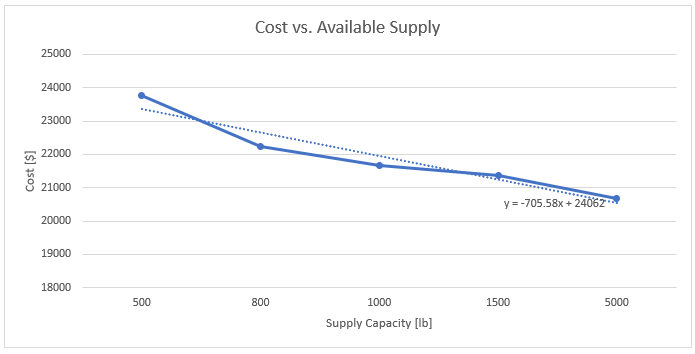

### 5.B. Two restuarants from all suppliers ###

In [35]:
# Display the result
sources = ["Albany","Atlanta","BaltimoreWashington","Boise","Boston","BuffaloRochester","California","Charlotte",
          "Chicago","CincinnatiDayton","Columbus","DallasFtWorth","Denver","Detroit","GrandRapids","GreatLakes",
          "HarrisburgScranton","HartfordSpringfield","Houston","Indianapolis","Jacksonville","LasVegas","LosAngeles",
          "Louisville","MiamiFtLauderdale","Nashville","NewOrleansMobile","NewYork","NorthernNewEngland",
          "Orlando","Philadelphia","PhoenixTucson","Pittsburgh","Plains","Portland","RaleighGreensboro","RichmondNorfolk",
          "Roanoke","Sacramento","SanDiego","SanFrancisco","Seattle","SouthCarolina","Spokane","StLouis","Syracuse",
          "Tampa","WestTexNewMexico"]
demands = ["Madison","Chicago"]
result = model_results["B"]
nzstates = []
for i in 1:48
    if sum(result[i,:]) != 0
        append!(nzstates, i)
    end
end
NamedArray(result[nzstates,:], (sources[nzstates], demands), ("SUPPLY", "DEMAND"))

3×2 Named Array{Float64,2}
 SUPPLY ╲ DEMAND │ Madison  Chicago
─────────────────┼─────────────────
CincinnatiDayton │     0.0   1000.0
DallasFtWorth    │  1000.0   1000.0
Houston          │  1000.0   1000.0

By utilizing a larger range of suppliers, we should hope to see a decrease in the total import cost. The resulting total cost is **29,836 dollars**. This is unexpected as the cost is higher than all the limited supply cases in part A, which does not fit with what we observed so far by relaxing constraints. Furthermore, as with **A.i**, the low avocado price per pound in Houston (3.49 dollars) and Dallas (3.6 dollars) caused them to be more cost effective suppliers compared to nearer supplier locations such as Chicago (5.2 dollars).

<img src="image/B.png" style="width:650px; height:400px">
<div style=' text-align: center;'><strong>Route from all 48 suppliers to 2 restaurants</strong></div>

### 5.C. Two restuarants from all suppliers with time constraint ###

In [37]:
# Display the result
# Transportation schedule for restaurant in Madison
result = model_results["C_mad"]
weeks = [i for i in 1:52]
nzweeks = []
for i in 1:52
    if sum(result[i,:]) != 0
        append!(nzweeks, i)
    end
end
nzstatesIndx = []
for j in 1:48
    if sum(result[:,j]) != 0
        append!(nzstatesIndx, j)
    end
end
df = DataFrame(hcat(weeks,result[:,nzstatesIndx]))
rename!(df, vcat("Week", sources[nzstatesIndx]))
showall(df[nzweeks,:])

13×6 DataFrame
│ Row │ Week    │ CincinnatiDayton │ DallasFtWorth │ Denver  │ Houston │
│     │ Float64 │ Float64          │ Float64       │ Float64 │ Float64 │
├─────┼─────────┼──────────────────┼───────────────┼─────────┼─────────┤
│ 1   │ 2.0     │ 0.0              │ 0.0           │ 1000.0  │ 1000.0  │
│ 2   │ 7.0     │ 1000.0           │ 0.0           │ 0.0     │ 1000.0  │
│ 3   │ 9.0     │ 1000.0           │ 0.0           │ 0.0     │ 0.0     │
│ 4   │ 15.0    │ 0.0              │ 1000.0        │ 0.0     │ 1000.0  │
│ 5   │ 18.0    │ 0.0              │ 0.0           │ 1000.0  │ 1000.0  │
│ 6   │ 22.0    │ 0.0              │ 1000.0        │ 0.0     │ 1000.0  │
│ 7   │ 27.0    │ 0.0              │ 1000.0        │ 0.0     │ 1000.0  │
│ 8   │ 30.0    │ 0.0              │ 1000.0        │ 0.0     │ 1000.0  │
│ 9   │ 33.0    │ 0.0              │ 1000.0        │ 0.0     │ 1000.0  │
│ 10  │ 37.0    │ 0.0              │ 1000.0        │ 0.0     │ 1000.0  │
│ 11  │ 41.0    │ 0.0              │

Below is the map of transportation route from all 48 suppliers to restaurant in Madison, Wisconsin. It shows all transportation routes from all weeks.

<img src="image/C-w.png" style="width:650px; height:400px">
<div style=' text-align: center;'><strong>Route from all 48 suppliers to restaurant in Madison, Wisconsin</strong></div>

In [38]:
# Display the result
# Transportation schedule for restaurant in Chicago
result = model_results["C_chi"]
weeks = [i for i in 1:52]
nzweeks = []
for i in 1:52
    if sum(result[i,:]) != 0
        append!(nzweeks, i)
    end
end
nzstatesIndx = []
for j in 1:48
    if sum(result[:,j]) != 0
        append!(nzstatesIndx, j)
    end
end
df = DataFrame(hcat(weeks,result[:,nzstatesIndx]))
rename!(df, vcat("Week", sources[nzstatesIndx]))
showall(df[nzweeks,:])

13×10 DataFrame
│ Row │ Week    │ CincinnatiDayton │ DallasFtWorth │ Denver  │ Houston │
│     │ Float64 │ Float64          │ Float64       │ Float64 │ Float64 │
├─────┼─────────┼──────────────────┼───────────────┼─────────┼─────────┤
│ 1   │ 2.0     │ 0.0              │ 0.0           │ 1000.0  │ 1000.0  │
│ 2   │ 5.0     │ 1000.0           │ 0.0           │ 0.0     │ 1000.0  │
│ 3   │ 9.0     │ 1000.0           │ 0.0           │ 0.0     │ 1000.0  │
│ 4   │ 14.0    │ 0.0              │ 1000.0        │ 0.0     │ 1000.0  │
│ 5   │ 19.0    │ 0.0              │ 0.0           │ 1000.0  │ 1000.0  │
│ 6   │ 21.0    │ 0.0              │ 1000.0        │ 0.0     │ 1000.0  │
│ 7   │ 27.0    │ 0.0              │ 1000.0        │ 0.0     │ 1000.0  │
│ 8   │ 29.0    │ 0.0              │ 1000.0        │ 0.0     │ 1000.0  │
│ 9   │ 33.0    │ 0.0              │ 1000.0        │ 0.0     │ 1000.0  │
│ 10  │ 37.0    │ 0.0              │ 1000.0        │ 0.0     │ 1000.0  │
│ 11  │ 41.0    │ 0.0              

Below is the map of transportation route from all 48 suppliers to restaurant in Chicago, Illinois. It shows all transportation routes from all weeks.

<img src="image/C-c.png" style="width:650px; height:400px">
<div style=' text-align: center;'><strong>Route from all 48 suppliers to restaurant in Chicago, Illinois</strong></div>

The program is able to provide the client with an optimal biweekly supply schedule for both restaurant locations. In both restaurant schedules, Houston is the most utilized supplier, followed by Dallas-Fort Worth. This is expected as both these suppliers have very low avocado prices that compensate for the long distance between them and the restaurants. The total annual cost of supplying both restaurants is **227,358.5 dollars**, which translates to a monthly average cost of **18,946.54 dollars**. 

The average monthly cost is significantly lower than the cost calculated in part A. By utilizing the weekly avocado price, the optimization model can take into account the market price fluctuations, hence lowering the total cost incurred on the client.

### 5.D. Optimal restaurant locations ###

#### 5.D.i Choose two restuarants from eight suppliers

In [39]:
# Display the result
sources = ["Chicago","St Louis","Indianapolis","Louisville","Columbus","Cincinnati Dayton","Grand Rapids","Detroit"]
demands = ["Chicago","St Louis","Indianapolis","Louisville","Columbus","Cincinnati Dayton","Grand Rapids","Detroit"]
result = model_results["Opt_2r8s_noLimit"]
nzdemand = []
for j in 1:8
    if sum(result[:,j]) != 0
        append!(nzdemand, j)
    end
end
NamedArray(result[:,nzdemand], (sources, demands[nzdemand]), ("SUPPLY", "DEMAND"))

8×2 Named Array{Float64,2}
  SUPPLY ╲ DEMAND │ Chicago  Detroit
──────────────────┼─────────────────
Chicago           │     0.0      0.0
St Louis          │  1000.0   1000.0
Indianapolis      │     0.0      0.0
Louisville        │  1000.0   1000.0
Columbus          │     0.0      0.0
Cincinnati Dayton │     0.0      0.0
Grand Rapids      │     0.0      0.0
Detroit           │     0.0      0.0

If one can select from only 8 possible locations, **Chicago and Detroit** would be the best locations to open restaurants that minimize the total cost.

#### 5.D.ii Choose two restuarants from all suppliers

In [40]:
# Display the result
sources = ["Albany","Atlanta","BaltimoreWashington","Boise","Boston","BuffaloRochester","California","Charlotte",
          "Chicago","CincinnatiDayton","Columbus","DallasFtWorth","Denver","Detroit","GrandRapids","GreatLakes",
          "HarrisburgScranton","HartfordSpringfield","Houston","Indianapolis","Jacksonville","LasVegas","LosAngeles",
          "Louisville","MiamiFtLauderdale","Nashville","NewOrleansMobile","NewYork","NorthernNewEngland",
          "Orlando","Philadelphia","PhoenixTucson","Pittsburgh","Plains","Portland","RaleighGreensboro","RichmondNorfolk",
          "Roanoke","Sacramento","SanDiego","SanFrancisco","Seattle","SouthCarolina","Spokane","StLouis","Syracuse",
          "Tampa","WestTexNewMexico"]
demands = ["Albany","Atlanta","BaltimoreWashington","Boise","Boston","BuffaloRochester","California","Charlotte",
          "Chicago","CincinnatiDayton","Columbus","DallasFtWorth","Denver","Detroit","GrandRapids","GreatLakes",
          "HarrisburgScranton","HartfordSpringfield","Houston","Indianapolis","Jacksonville","LasVegas","LosAngeles",
          "Louisville","MiamiFtLauderdale","Nashville","NewOrleansMobile","NewYork","NorthernNewEngland",
          "Orlando","Philadelphia","PhoenixTucson","Pittsburgh","Plains","Portland","RaleighGreensboro","RichmondNorfolk",
          "Roanoke","Sacramento","SanDiego","SanFrancisco","Seattle","SouthCarolina","Spokane","StLouis","Syracuse",
          "Tampa","WestTexNewMexico"]

result = model_results["Opt_2r48s_noLimit"]
nzsupply = []
nzdemand = []
for i in 1:48
    if sum(result[i,:]) != 0
        append!(nzsupply, i)
    end
    if sum(result[:,i]) != 0
        append!(nzdemand, i)
    end
end
NamedArray(result[nzsupply,nzdemand], (sources[nzsupply], demands[nzdemand]), ("SUPPLY", "DEMAND"))

2×2 Named Array{Float64,2}
SUPPLY ╲ DEMAND │           Albany  WestTexNewMexico
────────────────┼───────────────────────────────────
DallasFtWorth   │           1000.0            1000.0
Houston         │           1000.0            1000.0

If one can select from all 48 possible locations, **Albany and WestTex-NewMexico** would be the best locations to open restaurants that minimize the total cost.

## 6. Conclusion ##

### 6.A. Summary of findings ###

This project is successful in providing a client that opens two restaurants, one in Madison, Wisconsin and the other in Chicago, Illinois, with a set of avocado supplier combinations corresponding to several iterations with increasing complexity, such that the client can minimize the total cost, including the cost of transportation and the cost of buying avocados. 

In the first iteration, we restrict the suppliers from nearby states and play around with different supplier capacities. In the second iteration, we no longer restrict supplier locations and allow imports from restaurants all over the states. In the third iteration, we add the time constraint and assume that both restaurants need to import at least once per month, making the project more realistic and applicable to real-time clients. In the last iteration, we provide some recommendations to the client about where to open the two restaurants, if the locations are not decided yet.

In all the problem settings, the problem is modeled as a minimum cost network flow problem. The data values used to solve the optimization problems are adapted from a dataset consisting of avocado price averages and sales volume in multiple US markets. 

By solving the optimization problems, we found that it is more cost effective for the client to import produce from a supplier that is further away but has lower avocado price, compared to a nearer location with a higher average avocado price per pound. Furthermore, when supplier stock limits are introduced, the optimization model found it cheaper to import the entirety of a supplier’s stock to a single restaurant location rather than splitting the supply between two restaurant locations. 

### 6.B. Limitations ###

This project is based solely on a single dataset from Kaggle; thus, the data could be biased and not general enough. The number of avocado suppliers in the dataset are not complete, as we only consider 48 suppliers across the states.

In addition, this project calculates the transportation cost by multiplying distance and the average fuel price per mile. When calculating the distance between any two locations, we use the longitude and latitude coordinates and apply the Haversine forumula to calculate the distance in miles. However, this formula only calculates the straight distance between two locations and does not account for any realistic routes. For instance, highways usually contain curves, and there might exist lakes or rivers between two locations that cars cannot directly cross over. The Haversine distance is too ideal and can only be seen as an approximation of the real-life distance.

### 6.C. Future directions ###

One possible step is to find a larger dataset that contains more information about different avocado suppliers and the corresponding average price. 

Another future step that our team considers is to account for realistic routes when calculating the distance between any two locations. For instance, Google Maps always gives real-life route betweeen any two locations under modes of transportation. This can make the approximation of distance more accurate but could cost a lot more time.

Finally, although our team creates different variations of this problem, the scale of the project still greatly simplifies the issue of supply chains by ignoring many real-life complexities. For instance, we only consider the transpotation cost and avocado cost when calculating total cost. Some other costs that appear in real-life include sales taxes, long term contract benefits, etc. These costs can be accounted for in the future to make the project more realistic.